###Importing the important libraries

In [ ]:
#Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Image Processing
import cv2 as cv
from PIL import Image
#Intracting with operating systems
import os
#Model processing
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19, VGG16, ResNet50
import tensorflow as tf
import tensorflow.keras.layers as tfl
from keras import models
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
%matplotlib inline

###Mounting the Google drive in the colab notebook

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

###Extracting the image names

In [ ]:
biotite_dir = os.listdir('../input/minerals-identification-dataset/minet/biotite')
bornite_dir = os.listdir('../input/minerals-identification-dataset/minet/bornite')
chrysocolla_dir = os.listdir('../input/minerals-identification-dataset/minet/chrysocolla')
malachite_dir = os.listdir('../input/minerals-identification-dataset/minet/malachite')
muscovite_dir = os.listdir('../input/minerals-identification-dataset/minet/muscovite')
pyrite_dir = os.listdir('../input/minerals-identification-dataset/minet/pyrite')
quartz_dir = os.listdir('../input/minerals-identification-dataset/minet/quartz')

In [ ]:
'''
biotite_dir = os.listdir('/content/gdrive/My Drive/Datasets/Data/biotite')
bornite_dir = os.listdir('/content/gdrive/My Drive/Datasets/Data/bornite')
chrysocolla_dir = os.listdir('/content/gdrive/My Drive/Datasets/Data/chrysocolla')
malachite_dir = os.listdir('/content/gdrive/My Drive/Datasets/Data/malachite')
muscovite_dir = os.listdir('/content/gdrive/My Drive/Datasets/Data/muscovite')
pyrite_dir = os.listdir('/content/gdrive/My Drive/Datasets/Data/pyrite')
quartz_dir = os.listdir('/content/gdrive/My Drive/Datasets/Data/quartz')
'''

###Resizing the images to a common and converting them to array's

In [ ]:
data = []
labels = []

In [ ]:
#Converting all the images into array
for img in biotite_dir:
    img_path = '../input/minerals-identification-dataset/minet/biotite/{}'.format(img)
    image = load_img(img_path, target_size=(224,224))
    image = img_to_array(image)

    data.append(image)
    labels.append(0)

#Converting all the images into array
for img in bornite_dir:
    img_path = '../input/minerals-identification-dataset/minet/bornite/{}'.format(img)
    image = load_img(img_path, target_size=(224,224))
    image = img_to_array(image)

    data.append(image)
    labels.append(1)

#Converting all the images into array
for img in chrysocolla_dir:
    img_path = '../input/minerals-identification-dataset/minet/chrysocolla/{}'.format(img)
    image = load_img(img_path, target_size=(224,224))
    image = img_to_array(image)

    data.append(image)
    labels.append(2)

#Converting all the images into array
for img in malachite_dir:
    img_path = '../input/minerals-identification-dataset/minet/malachite/{}'.format(img)
    image = load_img(img_path, target_size=(224,224))
    image = img_to_array(image)

    data.append(image)
    labels.append(3)
    
#Converting all the images into array
for img in muscovite_dir:
    img_path = '../input/minerals-identification-dataset/minet/muscovite/{}'.format(img)
    image = load_img(img_path, target_size=(224,224))
    image = img_to_array(image)

    data.append(image)
    labels.append(4)
    
#Converting all the images into array
for img in pyrite_dir:
    img_path = '../input/minerals-identification-dataset/minet/pyrite/{}'.format(img)
    image = load_img(img_path, target_size=(224,224))
    image = img_to_array(image)

    data.append(image)
    labels.append(5)
    
#Converting all the images into array
for img in quartz_dir:
    img_path = '../input/minerals-identification-dataset/minet/quartz/{}'.format(img)
    image = load_img(img_path, target_size=(224,224))
    image = img_to_array(image)

    data.append(image)
    labels.append(6)

In [ ]:
#Converting the data and labels list into arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)

In [ ]:
#converting the 3 dimensional image array's to 1 dimensional to save them in a dataframe
data_df = []
for i in range(len(data)):
    data_df.append(data[i].reshape(150528))

In [ ]:
data_df = pd.DataFrame(data_df)
labels = pd.DataFrame(labels)
labels.columns = ['labels']
data_df = pd.concat([data_df,labels],axis=1)

In [ ]:
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,150519,150520,150521,150522,150523,150524,150525,150526,150527,labels
0,228.0,203.0,209.0,228.0,203.0,209.0,228.0,203.0,209.0,228.0,...,227.0,202.0,208.0,228.0,203.0,209.0,228.0,203.0,209.0,0
1,124.0,119.0,115.0,226.0,221.0,217.0,241.0,236.0,232.0,244.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0
2,32.0,29.0,22.0,31.0,28.0,21.0,31.0,28.0,21.0,34.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0
3,46.0,55.0,52.0,72.0,72.0,70.0,59.0,53.0,53.0,66.0,...,133.0,123.0,113.0,133.0,123.0,113.0,141.0,131.0,121.0,0
4,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0


###Splitting the data into train and test split

In [ ]:
X = data_df.drop('labels',axis=1)
y = data_df['labels']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

###Regularizing the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###Converting the data again into 3 dimension

In [ ]:
data_train = []
data_test = []

for i in range(len(X_train)):
  data_train.append(X_train[i].reshape(224,224,3))
for i in range(len(X_test)):
  data_test.append(X_test[i].reshape(224,224,3))

In [ ]:
X_train = np.array(data_train,dtype='float32')
X_test = np.array(data_test,dtype='float32')

In [ ]:
#converting the labels into categorical data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

###Data Visualization

In [ ]:
from matplotlib import pyplot

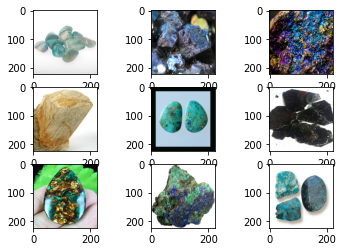

In [ ]:
for i in range(len(X_train)):
    # Show 9 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_train[i].reshape(224, 224, 3))
    # show the plot
    pyplot.show()
    break

##Training the models

####VGG-16 Model

In [ ]:
#base_model = ResNet50(include_top = False, weights = 'imagenet', input_shape = (224,224,3), classes = y_train.shape[1])
base_model = VGG16(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = tfl.Flatten()(base_model.output)
x =tfl.Dense(1024, activation='relu')(x)
x = tfl.Dropout(0.4)(x)
x =tfl.Dense(512, activation='relu')(x)
x = tfl.Dropout(0.4)(x)
x =tfl.Dense(256, activation='relu')(x)
x = tfl.Dropout(0.4)(x)
x =tfl.Dense(128, activation='relu')(x)
x = tfl.Dropout(0.4)(x)
x = tfl.Dense(7, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',metrics = ['accuracy'])

In [ ]:
steps_per_epoch = len(X_train)//32

In [ ]:
history = model.fit(X_train,y_train, validation_data = (X_test,y_test), steps_per_epoch = steps_per_epoch, epochs = 18)

Epoch 1/18
23/23 [==============================] - 177s 8s/step - loss: 0.3344 - accuracy: 0.4660 - val_loss: 0.3063 - val_accuracy: 0.5573
Epoch 2/18
23/23 [==============================] - 177s 8s/step - loss: 0.3257 - accuracy: 0.4817 - val_loss: 0.2827 - val_accuracy: 0.5521
Epoch 3/18
23/23 [==============================] - 176s 8s/step - loss: 0.3084 - accuracy: 0.5131 - val_loss: 0.2809 - val_accuracy: 0.6094
Epoch 4/18
23/23 [==============================] - 177s 8s/step - loss: 0.2982 - accuracy: 0.5340 - val_loss: 0.2741 - val_accuracy: 0.6458
Epoch 5/18
23/23 [==============================] - 177s 8s/step - loss: 0.2897 - accuracy: 0.5471 - val_loss: 0.2802 - val_accuracy: 0.5573
Epoch 6/18
23/23 [==============================] - 177s 8s/step - loss: 0.2775 - accuracy: 0.5864 - val_loss: 0.2686 - val_accuracy: 0.5833
Epoch 7/18
23/23 [==============================] - 177s 8s/step - loss: 0.2534 - accuracy: 0.6296 - val_loss: 0.2393 - val_accuracy: 0.6406
Epoch 8/18
23

In [ ]:
model.evaluate(X_test,y_test)

6/6 [==============================] - 35s 6s/step - loss: 0.1849 - accuracy: 0.7344


[0.18491582572460175, 0.734375]

In [ ]:
pred = (model.predict(X_test)>0.5).astype('int32')

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score,accuracy_score

In [ ]:
print(f1_score(pred,y_test,average=None))
print()
print(accuracy_score(pred,y_test))
print()
#print(confusion_matrix(pred,y_test))
#print()
print(classification_report(pred,y_test))

[0.         0.8        0.8358209  0.85365854 0.30769231 0.52631579
 0.84745763]

0.7083333333333334

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.82      0.78      0.80        46
           2       0.88      0.80      0.84        35
           3       0.81      0.90      0.85        39
           4       0.18      1.00      0.31         2
           5       0.45      0.62      0.53        16
           6       0.93      0.78      0.85        32

   micro avg       0.71      0.80      0.75       170
   macro avg       0.58      0.70      0.60       170
weighted avg       0.81      0.80      0.80       170
 samples avg       0.71      0.71      0.71       170



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


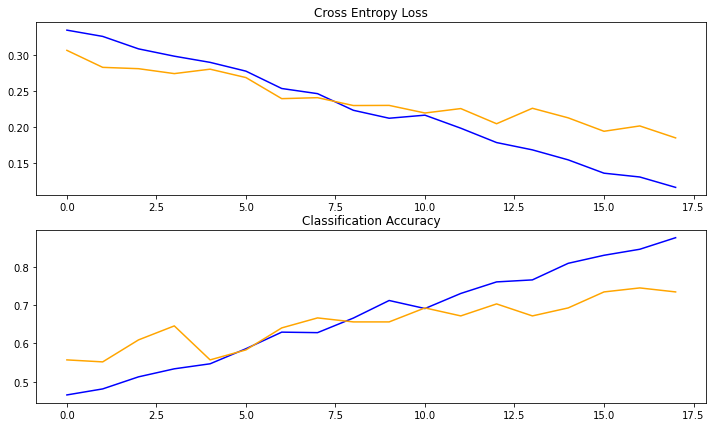

In [ ]:
plt.figure(figsize=(12,7))
plt.subplot(2,1,1)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'],color='blue',label='train')
plt.plot(history.history['val_loss'],color='orange',label='test')
                
plt.subplot(2,1,2)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'],color='blue',label='train')
plt.plot(history.history['val_accuracy'],color='orange',label='test')

####VGG-19 Model

In [ ]:
base_model = VGG19(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = tfl.Flatten()(base_model.output)
x =tfl.Dense(1024, activation='relu')(x)
x = tfl.Dropout(0.4)(x)
x =tfl.Dense(512, activation='relu')(x)
x = tfl.Dropout(0.4)(x)
x =tfl.Dense(256, activation='relu')(x)
x = tfl.Dropout(0.4)(x)
x =tfl.Dense(128, activation='relu')(x)
x = tfl.Dropout(0.4)(x)
x = tfl.Dense(7, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',metrics = ['accuracy'])

In [ ]:
steps_per_epoch = len(X_train)//32

In [ ]:
history = model.fit(X_train,y_train, validation_data = (X_test,y_test), steps_per_epoch = steps_per_epoch, epochs = 18)

Epoch 1/18
23/23 [==============================] - 218s 9s/step - loss: 0.6405 - accuracy: 0.1198 - val_loss: 0.4214 - val_accuracy: 0.2708
Epoch 2/18
23/23 [==============================] - 217s 9s/step - loss: 0.5025 - accuracy: 0.1799 - val_loss: 0.4039 - val_accuracy: 0.2656
Epoch 3/18
23/23 [==============================] - 221s 10s/step - loss: 0.4744 - accuracy: 0.2199 - val_loss: 0.3901 - val_accuracy: 0.4323
Epoch 4/18
23/23 [==============================] - 216s 9s/step - loss: 0.4613 - accuracy: 0.2379 - val_loss: 0.3886 - val_accuracy: 0.4635
Epoch 5/18
23/23 [==============================] - 216s 9s/step - loss: 0.4299 - accuracy: 0.2796 - val_loss: 0.3758 - val_accuracy: 0.4167
Epoch 6/18
23/23 [==============================] - 216s 9s/step - loss: 0.4244 - accuracy: 0.2988 - val_loss: 0.3681 - val_accuracy: 0.4219
Epoch 7/18
23/23 [==============================] - 216s 9s/step - loss: 0.4134 - accuracy: 0.2897 - val_loss: 0.3533 - val_accuracy: 0.5052
Epoch 8/18
2

In [ ]:
model.evaluate(X_test,y_test)

6/6 [==============================] - 42s 7s/step - loss: 0.2608 - accuracy: 0.6146


[0.2607792019844055, 0.6145833134651184]

In [ ]:
pred = (model.predict(X_test)>0.5).astype('int32')

In [ ]:
print(f1_score(pred,y_test,average=None))
print()
print(accuracy_score(pred,y_test))
print()
#print(confusion_matrix(pred,y_test))
#print()
print(classification_report(pred,y_test))

[0.         0.65853659 0.52173913 0.79120879 0.         0.
 0.76666667]

0.5104166666666666

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.61      0.71      0.66        38
           2       0.38      0.86      0.52        14
           3       0.84      0.75      0.79        48
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.85      0.70      0.77        33

   micro avg       0.51      0.74      0.60       133
   macro avg       0.38      0.43      0.39       133
weighted avg       0.73      0.74      0.72       133
 samples avg       0.51      0.51      0.51       133



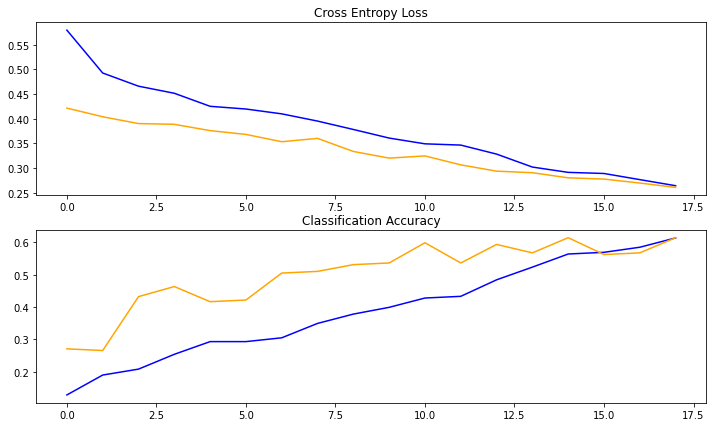

In [ ]:
plt.figure(figsize=(12,7))
plt.subplot(2,1,1)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'],color='blue',label='train')
plt.plot(history.history['val_loss'],color='orange',label='test')
                
plt.subplot(2,1,2)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'],color='blue',label='train')
plt.plot(history.history['val_accuracy'],color='orange',label='test')